In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
size = 13
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=size)
plt.rc('ytick', labelsize=size)
plt.rc('axes', labelsize=size)
plt.rc('legend', fontsize=size-2)
plt.rc('legend', handlelength=2)
plt.rc('font', size=size)
plt.rc('lines', markersize=size-6)
plt.rcParams['figure.dpi'] = 100

linestyles = ["-", ":", "-.", "--", (0, (3, 1, 1, 1, 1, 1)), "-", "--", "-.", ":"]
colors = ['#e4bf44', '#c65742', '#9ad0bb', '#87584E', '#aba18d', '#332737', '#e4bf44', '#c65742', '#9ad0bb', '#aba18d', '#332737']
markers = ["o", "v", "s", "d", "X", "p", "*", "o", "v", "s", "d", "*"]

layers = [1,2,4,6,8,10]

In [3]:
savename = "data/"
rel_ens_1d = np.load(savename + "rel_energies_1d.npy")
errs_1d = np.load(savename + "errs_1d.npy")

rel_ens_2d = np.load(savename + "rel_energies_2d.npy")
errs_2d = np.load(savename + "errs_2d.npy")

jastrow_ens_1d = np.load(savename + "jastrow_energy_learningcurve_1d.npy")
ens_1d = np.load(savename + "hybrid_energy_learningcurve_1d.npy")

jastrow_ens_2d = np.load(savename + "jastrow_energy_learningcurve_2d.npy")
ens_2d = np.load(savename + "hybrid_energy_learningcurve_2d.npy")

# Fig. 6

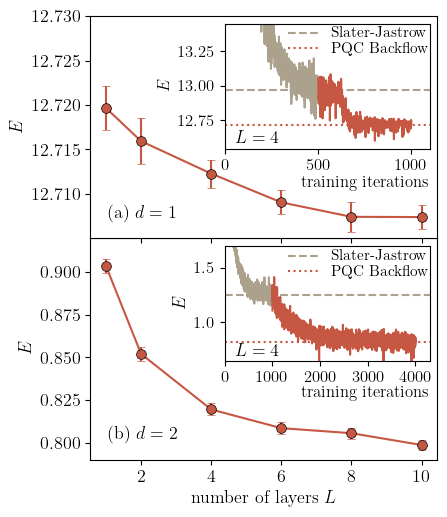

In [4]:
fig = plt.figure(figsize =(6.4*0.7, 4.8*1.2))

colspan = 4
rowspan = 5
nr,nc = 2*rowspan, colspan

plt12 = plt.subplot2grid((nr,nc), (rowspan, 0), rowspan=rowspan, colspan=colspan) 
plt11 = plt.subplot2grid((nr,nc), (0, 0), rowspan=rowspan, colspan=colspan, sharex=plt12) 
ax  = [plt11, plt12]

##############################################
# Subplot (a)
##############################################
i=0
ax[i].errorbar(layers, rel_ens_1d, yerr=errs_1d, label=f"Hybrid", color=colors[1], linestyle="-", marker=markers[0], markeredgecolor="black", markeredgewidth=0.5, capsize=3)
ax[i].set_ylabel(r"$E$")
ax[i].text(0.05, 0.15, f"(a) $d=1$", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

axins = inset_axes(ax[i], width=2.05, height=1.25)
axins.axhline(y=12.965041263792134, label=r"Slater-Jastrow", color=colors[-2], linestyle='--')
axins.axhline(y=12.712259121309513, label=r"PQC Backflow", color=colors[1], linestyle=':')

n1 = len(jastrow_ens_1d)
n2 = len(ens_1d)
x1 = np.linspace(1, n1, n1)
x2 = np.linspace(n1+1, n1+1+n2, n2)

axins.plot(x1, jastrow_ens_1d, color=colors[-2])
axins.plot(x2, ens_1d, color=colors[1])

axins.set_xlabel("training iterations", loc = "right", fontsize=size-1)
axins.xaxis.set_label_coords(1.0, -0.22)
axins.set_ylabel(r"$E$", fontsize=size-1)
axins.set_ylim(12.54, 13.45)
axins.set_xlim(left=0, right=1100)
axins.tick_params(axis='x', labelsize=size-1)
axins.tick_params(axis='y', labelsize=size-1)

axins.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.06, 1.08),labelspacing=.1)
axins.text(0.05, 0.15, f"$L=4$", transform=axins.transAxes, fontsize=size, verticalalignment='top')

##############################################
# Subplot (b)
##############################################
i=1
ax[i].errorbar(layers, rel_ens_2d, yerr=errs_2d, label=f"Hybrid", color=colors[1], linestyle="-", marker=markers[0], markeredgecolor="black", markeredgewidth=0.5, capsize=3)
ax[i].set_xlabel("number of layers $L$")
ax[i].set_ylabel(r"$E$")
ax[i].xaxis.set_ticks([2,4,6,8,10])
ax[i].text(0.05, 0.15, f"(b) $d=2$", transform=ax[i].transAxes, fontsize=size, verticalalignment='top')

axins = inset_axes(ax[i], width=2.05, height=1.15)
axins.axhline(y=1.2490137824322047, label=r"Slater-Jastrow", color=colors[-2], linestyle='--')
axins.axhline(y=0.8194709998131053, label=r"PQC Backflow", color=colors[1], linestyle=':')

n1 = len(jastrow_ens_2d)
n2 = len(ens_2d)
x1 = np.linspace(1, n1, n1)
x2 = np.linspace(n1+1, n1+1+n2, n2)

axins.plot(x1, jastrow_ens_2d, color=colors[-2])
axins.plot(x2, ens_2d, color=colors[1])

axins.set_xlabel("training iterations", loc = "right", fontsize=size-1)
axins.xaxis.set_label_coords(1.0, -0.22)
axins.set_ylabel(r"$E$")
axins.set_ylim(0.65, 1.7)
axins.set_xlim(left=0, right=4300)
axins.xaxis.set_ticks([0, 1000, 2000, 3000, 4000])
axins.tick_params(axis='x', labelsize=size-1)
axins.tick_params(axis='y', labelsize=size-1)
axins.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.06, 1.08),labelspacing=.1)
axins.text(0.05, 0.15, f"$L=4$", transform=axins.transAxes, fontsize=size, verticalalignment='top')

ax[0].set_ylim(12.705, 12.73)
ax[1].set_ylim(0.79, 0.92)

fig.subplots_adjust(hspace=0)   
for ax in [ax[0]]:
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_yticks(ax.get_yticks()[1:])  

# plt.savefig(f'_helium.png', dpi=300,bbox_inches='tight')
# plt.savefig(f'_helium.pdf', dpi=300,bbox_inches='tight')